"""
This script is used to analyze data for  Figure 3D of the manuscript
'Plasmid-mediated phenotypic noise leads to transient antibiotic resistance in bacteria'.

MIT License

Copyright (c) 2023 JCRHB/RPM

""";

In [24]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 8.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=72958c23970de0cb9a9cbc75b1ae0256dfcc2df67321c88024a02b02130c6ebb
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [25]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from matplotlib import gridspec
#from brokenaxes import brokenaxes
import numpy as np
#import lifelines

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rootDir="/content/drive/MyDrive/SYNC_Projects/"
rootDir=rootDir+"pBGT/GIT/"

dataPath=rootDir+"data/analysis/resilience/data_raw/"
outdataPath=rootDir+"data/analysis/resilience/data_table/"

dataMGGT30m=dataPath+"MGGT/MGGT-30-min-sampling/"
dataMGGT2h=dataPath+"MGGT/MGGT-2-hrs-sampling/"
datapBGT30m=dataPath+"pBGT/pBGT-30-min-sampling/"
datapBGT2h=dataPath+"pBGT/pBGT-2-hrs-sampling/"
dataG54U=dataPath+"G54U/"
dataG55U=dataPath+"G55U/"


skipWells=['A1','B1','C1','D1','E1','F1','G1','H1']

In [11]:

pBGT30m=os.listdir(datapBGT30m)
pBGT2h=os.listdir(datapBGT2h)
MGGT30m=os.listdir(dataMGGT30m)
MGGT2h=os.listdir(dataMGGT2h)
G54U=os.listdir(dataG54U)
G55U=os.listdir(dataG55U)



## Count for pBGT plates

In [12]:
pBGT_dict30m={}
pBGT_dict30mO={}
pBGT_dict30mG={}
pBGT_dict30mGO={}
for this_file in pBGT30m:
    if("AMP" in this_file):
        continue
    this_df=pd.read_csv(datapBGT30m+this_file,sep="\t|\n",skiprows=10,encoding="iso-8859-15",index_col=0,engine='python')
    #print(this_df['A1']['OD:630'])
    print(this_file)
    t_time=this_file.split('-')[1].split('.')[0].split('_')
    time=float(t_time[0])
    t_time=float(t_time[1])
    if(t_time==30):
        time=time+.5
    #pBGT_dict=dict(time=[])
    pBGT_dict30m[time]=[]
    pBGT_dict30mO[time]=[]
    pBGT_dict30mG[time]=[]
    pBGT_dict30mGO[time]=[]
    print(time,end='\t')
    for coln in this_df.columns:
        if(coln not in skipWells):
            val=this_df[coln]['OD:630']
            valG=this_df[coln]['EGFP:479,520']
            valGO=this_df[coln]['GFP/OD']
            if(val>=.2):
                #print(this_df[coln])
                #print(val,valG,valGO,end=' *,')
                pBGT_dict30m[time].append(coln)
                pBGT_dict30mO[time].append(val)
                pBGT_dict30mG[time].append(valG)
                pBGT_dict30mGO[time].append(valGO)
    print(pBGT_dict30m[time],end='\t')
    print(len(pBGT_dict30m[time]))
    #print(x)

pBGT_dict2h={}
pBGT_dict2hO={}
pBGT_dict2hG={}
pBGT_dict2hGO={}
for this_file in pBGT2h:
    if("AMP" in this_file):
        continue
    this_df=pd.read_csv(datapBGT2h+this_file,sep="\t|\n",skiprows=10,encoding="iso-8859-15",index_col=0,engine='python')

    t_time=this_file.split('-')[1].split('.')[0].split('_')
    time=float(t_time[0])
    t_time=float(t_time[1])
    if(t_time==30):
        time=time+.5

    pBGT_dict2h[time]=[]
    pBGT_dict2hO[time]=[]
    pBGT_dict2hG[time]=[]
    pBGT_dict2hGO[time]=[]
    print(time,end='\t')
    for coln in this_df.columns:
        if(coln not in skipWells):
            val=this_df[coln]['OD:630']
            valG=this_df[coln]['EGFP:479,520']
            valGO=this_df[coln]['GFP/OD']
            if(val>=.2):
            #print(val,end=' ,')
                pBGT_dict2h[time].append(coln)
                pBGT_dict2hO[time].append(val)
                pBGT_dict2hG[time].append(valG)
                pBGT_dict2hGO[time].append(valGO)
    print(pBGT_dict2h[time],end='\t')
    print(len(pBGT_dict2h[time]))
    #print(x)

pBGT-24_00.txt
24.0	['D7']	1
pBGT-00_30.txt
0.5	['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12']	88
pBGT-06_00.txt
6.0	[]	0
pBGT-00_00.txt
0.0	['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', '

## Count MGGT plates

In [13]:
MGGT_dict30m={}
MGGT_dict30mO={}
MGGT_dict30mG={}
MGGT_dict30mGO={}
times_list30m=[]
for this_file in MGGT30m:
    if("AMP" in this_file):
        continue
    this_df=pd.read_csv(dataMGGT30m+this_file,sep="\t|\n",skiprows=10,encoding="iso-8859-15",index_col=0,engine='python')
    #print(this_df['A1']['OD:630'])
    t_time=this_file.split('-')[1].split('.')[0].split('_')
    time=float(t_time[0])
    t_time=float(t_time[1])
    if(t_time==30):
        time=time+.5
    #pBGT_dict=dict(time=[])
    MGGT_dict30m[time]=[]
    MGGT_dict30mO[time]=[]
    MGGT_dict30mG[time]=[]
    MGGT_dict30mGO[time]=[]
    times_list30m.append(time)
    print(time,end='\t')
    for coln in this_df.columns:
        if(coln not in skipWells):
            val=this_df[coln]['OD:630']
            valG=this_df[coln]['EGFP:479,520']
            valGO=this_df[coln]['GFP/OD']
            if(val>=.2):
            #print(val,end=' ,')
                MGGT_dict30m[time].append(coln)
                MGGT_dict30mO[time].append(val)
                MGGT_dict30mG[time].append(valG)
                MGGT_dict30mGO[time].append(valGO)
    print(MGGT_dict30m[time],end='\t')
    print(len(MGGT_dict30m[time]))



MGGT_dict2h={}
MGGT_dict2hO={}
MGGT_dict2hG={}
MGGT_dict2hGO={}
times_list2h=[]
for this_file in MGGT2h:
    if("AMP" in this_file):
        continue
    this_df=pd.read_csv(dataMGGT2h+this_file,sep="\t|\n",skiprows=10,encoding="iso-8859-15",index_col=0,engine='python')
    #print(this_df['A1']['OD:630'])
    t_time=this_file.split('-')[1].split('.')[0].split('_')
    time=float(t_time[0])
    t_time=float(t_time[1])
    if(t_time==30):
        time=time+.5
    #pBGT_dict=dict(time=[])
    MGGT_dict2h[time]=[]
    MGGT_dict2hO[time]=[]
    MGGT_dict2hG[time]=[]
    MGGT_dict2hGO[time]=[]
    times_list2h.append(time)
    print(time,end='\t')
    for coln in this_df.columns:
        if(coln not in skipWells):
            val=this_df[coln]['OD:630']
            valG=this_df[coln]['EGFP:479,520']
            valGO=this_df[coln]['GFP/OD']
            if(val>=.2):
            #print(val,end=' ,')
                MGGT_dict2h[time].append(coln)
                MGGT_dict2hO[time].append(val)
                MGGT_dict2hG[time].append(valG)
                MGGT_dict2hGO[time].append(valGO)
    print(MGGT_dict2h[time],end='\t')
    print(len(MGGT_dict2h[time]))
    #print(x)

times_tot=times_list30m+times_list2h
times_tot=set(times_tot)
times_tot=list(times_tot)
times_tot.sort()

6.0	[]	0
2.0	['A12', 'H6']	2
18.0	[]	0
0.0	['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12']	88
3.0	[]	0
7.0	[]	0
8.0	[]	0
1.0	['A2', 'A3', 'A4', 'A6', 'A7', 'A8', 'A11', 'A12', 'B6', 'B7', 'B8', 'B11', 'B12', 'C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C12', 'D3', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E4', 'E5', 'E7', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F6', 'F7', 'F9', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G7', 'G8', 'G9', 'G11', 'H6', 'H11', 'H12']	53
1.5	['B11', 'C9', 'E11', 'F7']	

## Count G54U plates

In [14]:
G54U_dict={}
G54U_dictO={}
G54U_dictG={}
G54U_dictGO={}
#times_list=[]
for this_file in G54U:
    if("AMP" in this_file or "ON" in this_file):
        continue
    this_df=pd.read_csv(dataG54U+this_file,sep="\t|\n",skiprows=10,encoding="iso-8859-15",index_col=0,engine='python')
    #print(this_df['A1']['OD:630'])
    t_time=this_file.split('_')
    time=float(t_time[2])
    t_time=float(t_time[3].split(".")[0])
    if(t_time==30):
        time=time+.5
    #pBGT_dict=dict(time=[])
    G54U_dict[time]=[]
    G54U_dictO[time]=[]
    G54U_dictG[time]=[]
    G54U_dictGO[time]=[]
    #times_list.append(time)
    print(time,end='\t')
    for coln in this_df.columns:
        if(coln not in skipWells):
            val=this_df[coln]['OD:630']
            valG=this_df[coln]['EGFP:479,520']
            valGO=this_df[coln]['GFP/OD']
            if(val>=.2):
            #print(val,end=' ,')
                G54U_dict[time].append(coln)
                G54U_dictO[time].append(val)
                G54U_dictG[time].append(valG)
                G54U_dictGO[time].append(valGO)
    print(G54U_dict[time],end='\t')
    print(len(G54U_dict[time]))





0.5	['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12']	88
5.5	[]	0
0.0	['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 

## Count G55U plates

In [15]:
G55U_dict={}
G55U_dictO={}
G55U_dictG={}
G55U_dictGO={}
#times_list30m=[]
for this_file in G55U:
    if("AMP" in this_file or "ON" in this_file):
        continue
    this_df=pd.read_csv(dataG55U+this_file,sep="\t|\n",skiprows=10,encoding="iso-8859-15",index_col=0,engine='python')
    #print(this_df['A1']['OD:630'])
    t_time=this_file.split('_')
    time=float(t_time[2])
    t_time=float(t_time[3].split(".")[0])
    if(t_time==30):
        time=time+.5
    #pBGT_dict=dict(time=[])
    G55U_dict[time]=[]
    G55U_dictO[time]=[]
    G55U_dictG[time]=[]
    G55U_dictGO[time]=[]
    #times_list30m.append(time)
    print(time,end='\t')
    for coln in this_df.columns:
        if(coln not in skipWells):
            val=this_df[coln]['OD:630']
            valG=this_df[coln]['EGFP:479,520']
            valGO=this_df[coln]['GFP/OD']
            if(val>=.2):
            #print(val,end=' ,')
                G55U_dict[time].append(coln)
                G55U_dictO[time].append(val)
                G55U_dictG[time].append(valG)
                G55U_dictGO[time].append(valGO)
    print(G55U_dict[time],end='\t')
    print(len(G55U_dict[time]))





0.0	['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12']	88
1.0	['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G6

## Eliminate false positives

In [16]:
falses_pBGT_30m={24.0:'D7'}
falses_MGGT_2h={8.0:'F2',10.0:'F2',12.0:'F2',24.0:'F2'}
for k,v in falses_pBGT_30m.items():
    print(pBGT_dict30m[k])
    pBGT_dict30m[k].remove(v)
    print(pBGT_dict30m[k])

for k,v in falses_MGGT_2h.items():
    print(MGGT_dict2h[k])
    MGGT_dict2h[k].remove(v)
    print(MGGT_dict2h[k])


['D7']
[]
['F2']
[]
['F2']
[]
['F2']
[]
['F2']
[]


## Plots!


[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 18.0, 24.0]
[88, 15, 0, 1, 1, 0, 0, 0] [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 24.0]


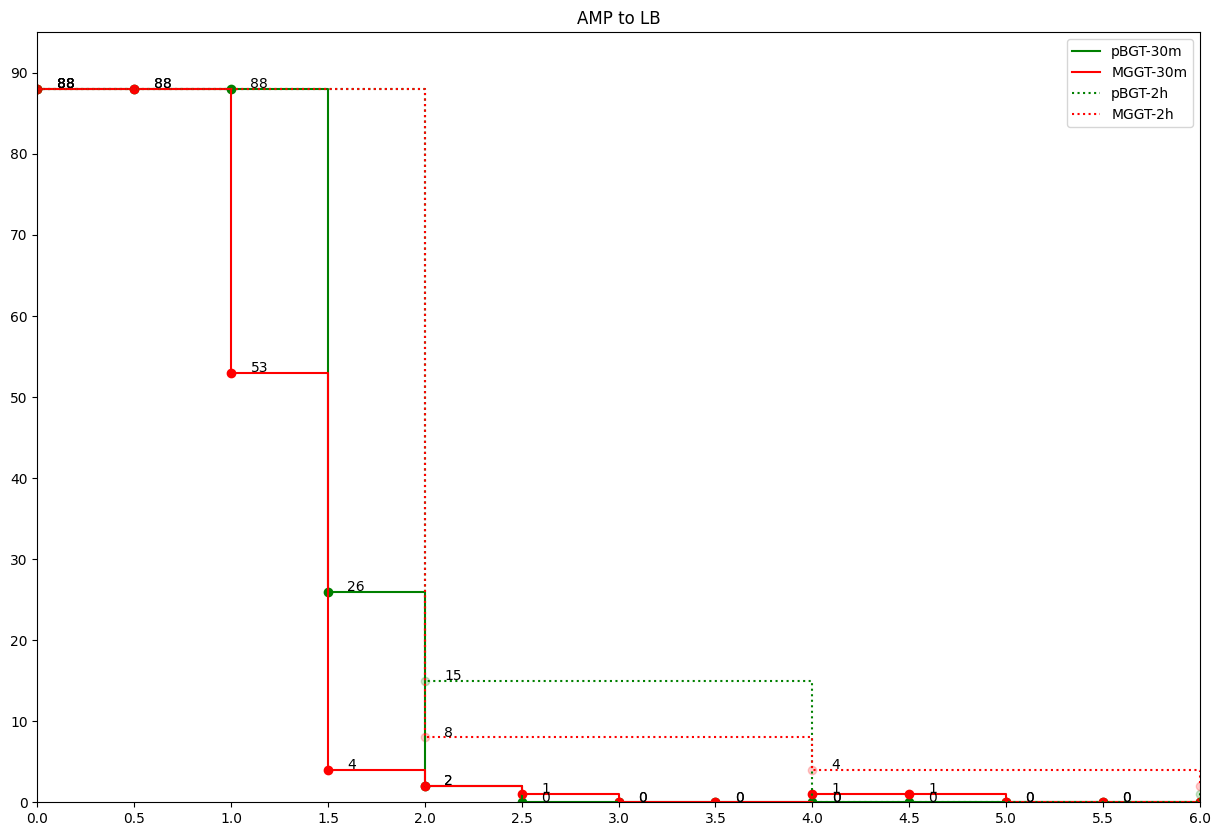

In [18]:

plt.figure(figsize=(15,10))
times=list(pBGT_dict30m.keys())
times.sort()
print(times)
y=[len(pBGT_dict30m[key]) for key in times]
plt.step(times, y,c='g',linestyle='solid', label='pBGT-30m',where="post")
plt.scatter(times, y,c='g')
for x,y in zip(times,y):
    plt.annotate(y,(x+.1,y+.1))


y=[len(MGGT_dict30m[key]) for key in times]
plt.step(times, y,c='r', label='MGGT-30m',where="post")
plt.scatter(times, y,c='r')
for x,y in zip(times,y):
    plt.annotate(y,(x+.1,y+.1))


times=list(pBGT_dict2h.keys())
times.sort()

y=[len(pBGT_dict2h[key]) for key in times]
print(y,times)
plt.step(times, y,c='g',linestyle='dotted' ,label='pBGT-2h',where="post")
plt.scatter(times, y,c='g',alpha=.2)
for x,y in zip(times,y):
    plt.annotate(y,(x+.1,y+.1))
y=[len(MGGT_dict2h[key]) for key in times]
plt.step(times, y,c='r',linestyle='dotted',label='MGGT-2h',where="post")
plt.scatter(times, y,c='r',alpha=.2)
for x,y in zip(times,y):
    plt.annotate(y,(x+.1,y+.1))




plt.xticks(times_tot)
plt.xlim(0,6)
plt.ylim(0,95)
plt.yticks(range(0,91,10))
plt.title("AMP to LB")
#plt.xscale('log')
plt.legend()
#plt.savefig("./figures/AMP-LB-both.pdf")
plt.show()

## Calculate survival probabilities

In [19]:
pBGT_all={}
pBGT_prob={}
for t in times_tot:
    pBGT_all[t]=[]
    nt=0
    ns=0
    if(t in pBGT_dict2h.keys()):
        ns=ns+len(pBGT_dict2h[t])
        nt=nt+88
        pBGT_all[t]=pBGT_all[t]+pBGT_dict2h[t]
    if(t in pBGT_dict30m):
        ns=ns+len(pBGT_dict30m[t])
        pBGT_all[t]=pBGT_all[t]+pBGT_dict30m[t]
        nt=nt+88
   # print(ns,nt)
    #print(pBGT_all[t])
    pBGT_prob[t]=ns/nt

MGGT_all={}
MGGT_prob={}
for t in times_tot:
    MGGT_all[t]=[]
    nt=0
    ns=0
    if(t in MGGT_dict2h.keys()):
        ns=ns+len(MGGT_dict2h[t])
        nt=nt+88
        MGGT_all[t]=MGGT_all[t]+MGGT_dict2h[t]
    if(t in MGGT_dict30m):
        ns=ns+len(MGGT_dict30m[t])
        MGGT_all[t]=MGGT_all[t]+MGGT_dict30m[t]
        nt=nt+88
    #print(ns,nt)
    #print(pBGT_all[t])
    MGGT_prob[t]=ns/nt


print(G54U_dict  )
G54U_all={}
G54U_prob={}
for t in times_tot:
    G54U_all[t]=[]
    nt=0
    ns=0
    if(t in G54U_dict.keys()):
        #print(t,end="\t")
        ns=len(G54U_dict[t])
        nt=nt+88
        G54U_all[t]=G54U_all[t]+G54U_dict[t]
        G54U_prob[t]=ns/nt
        #print(t,ns,nt)
        #print(G54U_all[t])

G55U_all={}
G55U_prob={}
timesU=[]
for t in times_tot:
    G55U_all[t]=[]
    nt=0
    ns=0
    if(t in G55U_dict.keys()):
        timesU.append(t)
        #print(t,end="\t")
        ns=len(G55U_dict[t])
        nt=nt+88
        G55U_all[t]=G55U_all[t]+G55U_dict[t]
        G55U_prob[t]=ns/nt
        #print(t,ns,nt)
        #print(G55U_all[t])












MGGT_prob=dict(sorted(MGGT_prob.items()))
pBGT_prob=dict(sorted(pBGT_prob.items()))
G54U_prob=dict(sorted(G54U_prob.items()))
G55U_prob=dict(sorted(G55U_prob.items()))

{0.5: ['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12'], 5.5: [], 0.0: ['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3',

In [20]:
pBGT_prob

{0.0: 1.0,
 0.5: 1.0,
 1.0: 1.0,
 1.5: 0.29545454545454547,
 2.0: 0.09659090909090909,
 2.5: 0.0,
 3.0: 0.0,
 3.5: 0.0,
 4.0: 0.0,
 4.5: 0.0,
 5.0: 0.0,
 5.5: 0.0,
 6.0: 0.005681818181818182,
 6.5: 0.0,
 7.0: 0.0,
 7.5: 0.0,
 8.0: 0.005681818181818182,
 10.0: 0.0,
 12.0: 0.0,
 18.0: 0.0,
 24.0: 0.0}

## Plot survival probability

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 7.0, 8.0, 10.0, 12.0, 24.0]
[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 7.0, 8.0, 10.0, 12.0, 24.0]


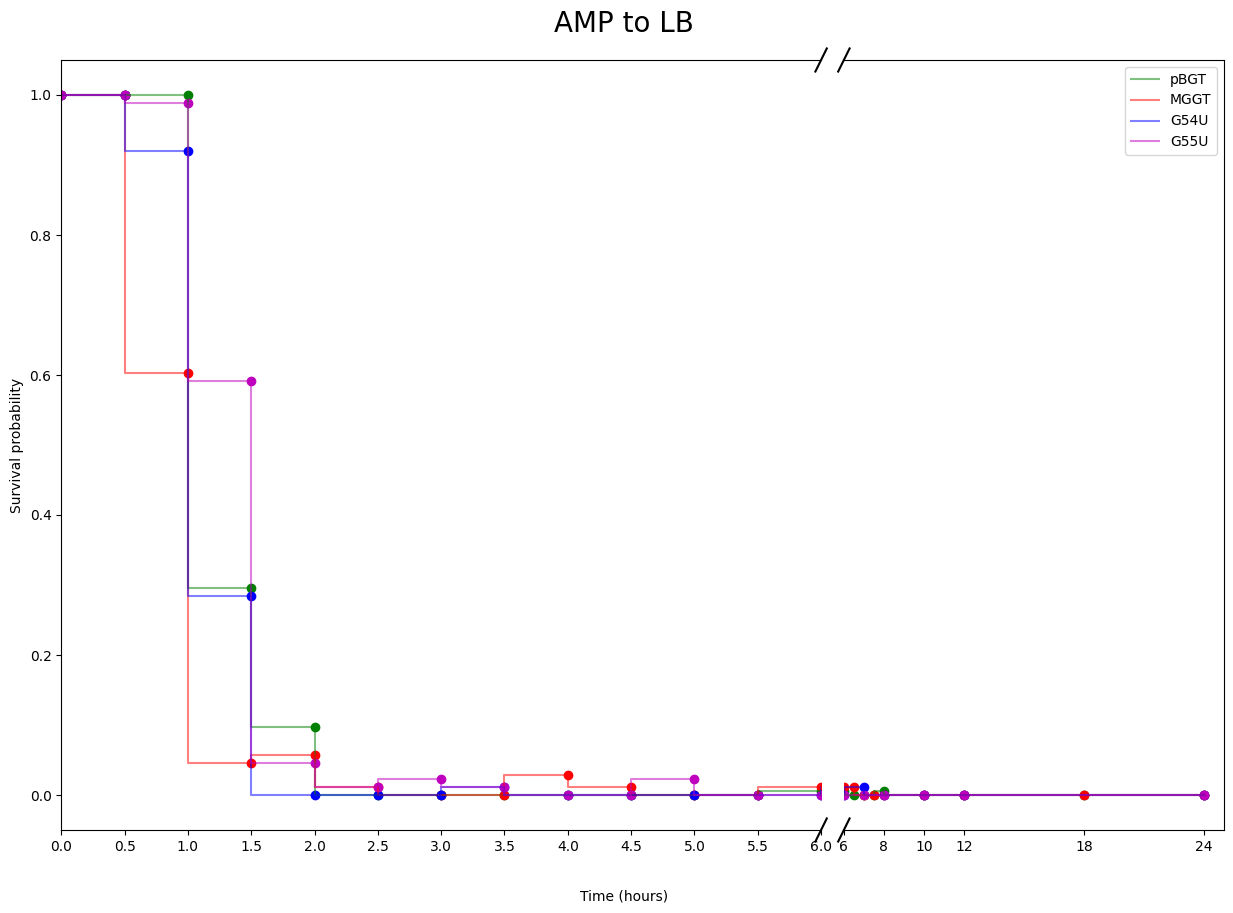

In [21]:
## Ratio of the two plots
r1=2
r2=1

stype='pre'

fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [r1,r2],'wspace':.04},sharey=True,figsize=(15,10))

d = .015 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=axs[0].transAxes, color='k', clip_on=False)
axs[0].plot((1-d/(r1),1+d/r1), (-d,d), **kwargs)
axs[0].plot((1-d/r1,1+d/r1),(1-d,1+d), **kwargs)

kwargs.update(transform=axs[1].transAxes)
axs[1].plot((-d,+d), (1-d,1+d), **kwargs)
axs[1].plot((-d,+d), (-d,+d), **kwargs)


n1samples=12
times=list(pBGT_prob.keys())
ltimes=times[0:n1samples+1]
ltimes1=times[n1samples:]

y=[pBGT_prob[key] for key in times]
axs[0].step(times, y,c='g',linestyle='solid',alpha=.5,where=stype, label='pBGT')
#axs[0].plot(times, y,c='g',linestyle='solid',alpha=.5, label='pBGT')
axs[0].scatter(times, y,c='g')
axs[1].step(times, y,c='g',linestyle='solid',alpha=.5, label='pBGT')
axs[1].scatter(times, y,c='g')
for x,y in zip(times,y):
    y=round(y,3)
    #axs[0].annotate(y,(x,y))
    #axs[1].annotate(y,(x,y))



y=[MGGT_prob[key] for key in times]
axs[0].step(times, y,c='r',linestyle='solid',alpha=.5,where=stype, label='MGGT')
#axs[0].plot(times, y,c='r',linestyle='solid',alpha=.5, label='MGGT')
axs[0].scatter(times, y,c='r')
axs[1].step(times, y,c='r',linestyle='solid',alpha=.5, label='MGGT')
axs[1].scatter(times, y,c='r')
for x,y in zip(times,y):
    y=round(y,3)
    #axs[0].annotate(y,(x,y))
    #axs[1].annotate(y,(x,y))


y=[G54U_prob[key] for key in G54U_prob.keys()]
timesU=[k for k in G54U_prob.keys()]
print(timesU)
axs[0].step(timesU, y,c='b',linestyle='solid',alpha=.5,where=stype, label='G54U')
#axs[0].plot(timesU, y,c='b',linestyle='solid',alpha=.5, label='G54U')
axs[0].scatter(timesU, y,c='b')
axs[1].step(timesU, y,c='b',linestyle='solid',alpha=.5, label='G54U')
axs[1].scatter(timesU, y,c='b')
for x,y in zip(timesU,y):
    y=round(y,3)
    #axs[0].annotate(y,(x,y))
    #axs[1].annotate(y,(x,y))

y=[G55U_prob[key] for key in G55U_prob.keys()]
timesU=[k for k in G55U_prob.keys()]
print(timesU)
axs[0].step(timesU, y,c='m',linestyle='solid',where=stype,alpha=.5, label='G55U')
#axs[0].plot(timesU, y,c='m',linestyle='solid',alpha=.5, label='G55U')
axs[0].scatter(timesU, y,c='m')
axs[1].step(timesU, y,c='m',linestyle='solid',alpha=.5, label='G55U')
axs[1].scatter(timesU, y,c='m')
for x,y in zip(timesU,y):
    y=round(y,3)
    #axs[0].annotate(y,(x,y))
    #axs[1].annotate(y,(x,y))


axs[1].legend()


axs[0].set_xlim(0,times[n1samples]-.25)
axs[1].set_xlim(times[n1samples],25)


axs[0].spines['right'].set_visible(False)
#axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)


axs[1].yaxis.set_visible(False)


axs[0].set_xticks(ltimes)

ttimes1=[]
for t in ltimes1:
    if(t%2 == 0):
        ttimes1.append(t)

axs[1].set_xticks(ttimes1)

fig.text(.5,.04,"Time (hours)",ha="center")
axs[0].set_ylabel("Survival probability")

fig.suptitle("AMP to LB",y=.93,fontsize=20)


#fig.legend()
#axs[0].title("AMP to LB")

#plt.title("AMP to LB")
#axs[0].st_yscale('log')
# plt.xlabel("Time (hrs)")
# plt.set_ylabel("Survival probability")


#plt.savefig("./figures/SurvivalProb_AMP-LB_allstep.pdf")
plt.show()

## Kaplan Meier Analysis

In [26]:
from lifelines import KaplanMeierFitter
from lifelines.utils import restricted_mean_survival_time
times_tot.sort()



this_probs=MGGT_prob
vals=list(this_probs.values())
vals=[round(val*100) for val in vals]

obs=[0]
durs=[times_tot[0]]
sums=0
flag=False
for ti,t in enumerate(times_tot):
    val=vals[ti]
    valprev=vals[ti-1]
    vald=int(valprev-val)
    for x in range(0,vald):
        sums=sums+1
        durs.append(t)
        obs.append(1)

kmf_MGGT = KaplanMeierFitter().fit(durs,obs,timeline=times_tot,label='MGGT')


this_probs=pBGT_prob
vals=list(this_probs.values())
vals=[round(val*100) for val in vals]

obs=[0]
durs=[times_tot[0]]
sums=0
flag=False
for ti,t in enumerate(times_tot):
    val=vals[ti]
    valprev=vals[ti-1]
    vald=int(valprev-val)
    for x in range(0,vald):
        sums=sums+1
        durs.append(t)
        obs.append(1)
kmf_pBGT = KaplanMeierFitter().fit(durs,obs,timeline=times_tot,label='pBGT')



this_probs=G54U_prob
vals=list(this_probs.values())
vals=[round(val*100) for val in vals]

obs=[0]
durs=[times_tot[0]]

for ti,t in enumerate(G54U_prob.keys()):
    val=vals[ti]
    valprev=vals[ti-1]
    vald=int(valprev-val)
    for x in range(0,vald):
        durs.append(t)
        obs.append(1)


kmf_G54U = KaplanMeierFitter().fit(durs,obs,timeline=times_tot,label='G54U')

this_probs=G55U_prob
vals=list(this_probs.values())
vals=[round(val*100) for val in vals]

obs=[0]
durs=[times_tot[0]]
sums=0
flag=False
for ti,t in enumerate(G55U_prob.keys()):
    val=vals[ti]
    valprev=vals[ti-1]
    vald=int(valprev-val)
    for x in range(0,vald):
        sums=sums+1
        durs.append(t)
        obs.append(1)

#print(durs,obs)
kmf_G55U = KaplanMeierFitter().fit(durs,obs,timeline=times_tot,label='G55U')





# Kaplan-Meier Analysis

## Survival function

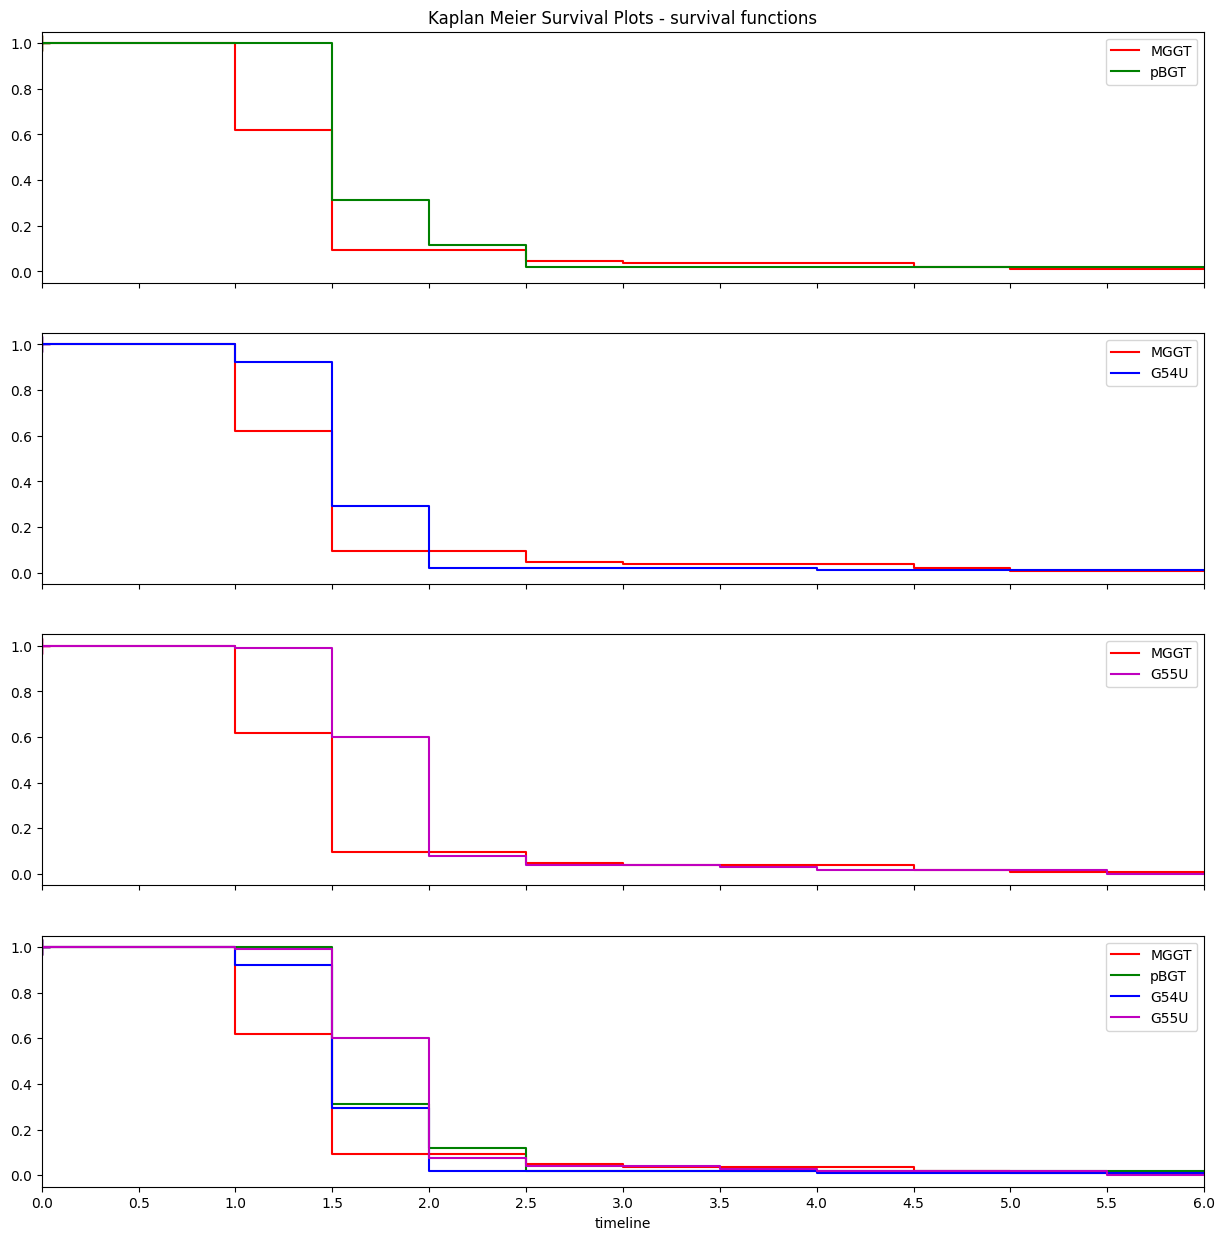

In [29]:
fig,ax=plt.subplots(4,1,sharex=True,sharey=True,figsize=(15,15))
limit=1.5
timeline=np.array([x for x in times_tot])




kmf_MGGT.plot(ax=ax[0], c="r", ci_show=False,show_censors=True)
kmf_pBGT.plot(ax=ax[0], c="g", ci_show=False,show_censors=True)

kmf_MGGT.plot(ax=ax[1], c="r", ci_show=False,show_censors=True)
kmf_G54U.plot(ax=ax[1], c="b", ci_show=False,show_censors=True)

kmf_MGGT.plot(ax=ax[2], c="r", ci_show=False,show_censors=True)
kmf_G55U.plot(ax=ax[2], c="m", ci_show=False,show_censors=True)

kmf_MGGT.plot(ax=ax[3], c="r", ci_show=False,show_censors=True)
kmf_pBGT.plot(ax=ax[3], c="g", ci_show=False,show_censors=True)
kmf_G54U.plot(ax=ax[3], c="b", ci_show=False,show_censors=True)
kmf_G55U.plot(ax=ax[3], c="m", ci_show=False,show_censors=True)



ax[0].set_xticks(times_tot)
ax[0].set_xlim(0, 6)
ax[0].set_ylim(-.05, 1.05)

ax[0].set_title("Kaplan Meier Survival Plots - survival functions")


plt.show()



## Log-Rank test

In [30]:
from lifelines.statistics import logrank_test,pairwise_logrank_test,multivariate_logrank_test

#fig,ax=plt.subplots(4,1,sharex=True,sharey=True,figsize=(15,15))

print("")

MGGTvspBGT_results = logrank_test(kmf_MGGT.durations, kmf_pBGT.durations, event_observed_A=kmf_MGGT.event_observed, event_observed_B=kmf_pBGT.event_observed)
#kmf_G55U.durations
print("MGGTvspBGTresults")
#MGGTvspBGT_results.print_summary()
print("p-value:",MGGTvspBGT_results.p_value)
print("test statistic:",MGGTvspBGT_results.test_statistic)

MGGTvsG54U_results = logrank_test(kmf_MGGT.durations, kmf_G54U.durations, event_observed_A=kmf_MGGT.event_observed, event_observed_B=kmf_G54U.event_observed)

print("MGGTvsG54Uresults")
#MGGTvspBGT_results.print_summary()
print("p-value:",MGGTvsG54U_results.p_value)
print("test statistic:",MGGTvsG54U_results.test_statistic)

MGGTvsG55U_results = logrank_test(kmf_MGGT.durations, kmf_G55U.durations, event_observed_A=kmf_MGGT.event_observed, event_observed_B=kmf_G55U.event_observed)

print("MGGTvsG55Uresults")
#MGGTvspBGT_results.print_summary()
print("p-value:",MGGTvsG55U_results.p_value)
print("test statistic:",MGGTvsG55U_results.test_statistic)


alldurations=list(kmf_MGGT.durations)+list(kmf_pBGT.durations)+list(kmf_G54U.durations)+list(kmf_G55U.durations)
allevents=list(kmf_MGGT.event_observed)+list(kmf_pBGT.event_observed)+list(kmf_G54U.event_observed)+list(kmf_G55U.event_observed)
allgroups=["MGGT"]*len(list(kmf_MGGT.durations)) +["pBGT"]*len(list(kmf_pBGT.durations) ) +["G54U"]*len(list(kmf_G54U.durations) ) +["G55U"]*len(list(kmf_G55U.durations) )

all_result = multivariate_logrank_test(alldurations,allgroups,allevents)
print("allvsall")
#MGGTvspBGT_results.print_summary()
print("p-value:",all_result.p_value)
print("test statistic:",all_result.test_statistic)

print()
G54UvspBGT_results = logrank_test(kmf_G54U.durations, kmf_pBGT.durations, event_observed_A=kmf_G54U.event_observed, event_observed_B=kmf_pBGT.event_observed)
print("G54UvspBGTresults")
print("p-value:",G54UvspBGT_results.p_value)
print("test statistic:",G54UvspBGT_results.test_statistic)

G55UvspBGT_results = logrank_test(kmf_G55U.durations, kmf_pBGT.durations, event_observed_A=kmf_G55U.event_observed, event_observed_B=kmf_pBGT.event_observed)
print("G55UvspBGTresults")
print("p-value:",G55UvspBGT_results.p_value)
print("test statistic:",G55UvspBGT_results.test_statistic)

G54UvsG55U_results = logrank_test(kmf_G54U.durations, kmf_G55U.durations, event_observed_A=kmf_G54U.event_observed, event_observed_B=kmf_G55U.event_observed)
print("G54UvsG55Uresults")
print("p-value:",G54UvsG55U_results.p_value)
print("test statistic:",G54UvsG55U_results.test_statistic)


print("\n\n")
print("Pair-wise:\n")
pwall_result = pairwise_logrank_test(alldurations,allgroups,allevents)
print("pw-allvsall")
print("pairs:",pwall_result.name)
print("p-value:",list(pwall_result.p_value))
print("test statistic:",pwall_result.test_statistic)
pwall_result.print_summary()


MGGTvspBGTresults
p-value: 2.5200972551128435e-06
test statistic: 22.151113758724815
MGGTvsG54Uresults
p-value: 0.00017210750971134693
test statistic: 14.113463384428266
MGGTvsG55Uresults
p-value: 3.643132746349177e-10
test statistic: 39.295321075638356
allvsall
p-value: 5.3154330432629696e-12
test statistic: 55.52108954347061

G54UvspBGTresults
p-value: 0.055860950811905515
test statistic: 3.656198519700693
G55UvspBGTresults
p-value: 0.032456904036442906
test statistic: 4.574199662038456
G54UvsG55Uresults
p-value: 3.74413568006216e-05
test statistic: 16.99687676555894



Pair-wise:

pw-allvsall
pairs: [('G54U', 'G55U'), ('G54U', 'MGGT'), ('G54U', 'pBGT'), ('G55U', 'MGGT'), ('G55U', 'pBGT'), ('MGGT', 'pBGT')]
p-value: [3.74413568006216e-05, 0.00017210750971134736, 0.055860950811905515, 3.6431327463490964e-10, 0.032456904036442906, 2.5200972551128435e-06]
test statistic: [16.99687677 14.11346338  3.65619852 39.29532108  4.57419966 22.15111376]


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
           test_statistic      p  -log2(p)
G54U G55U           17.00 <0.005     14.71
     MGGT           14.11 <0.005     12.50
     pBGT            3.66   0.06      4.16
G55U MGGT           39.30 <0.005     31.35
     pBGT            4.57   0.03      4.95
MGGT pBGT           22.15 <0.005     18.60

## Restricted mean survival times

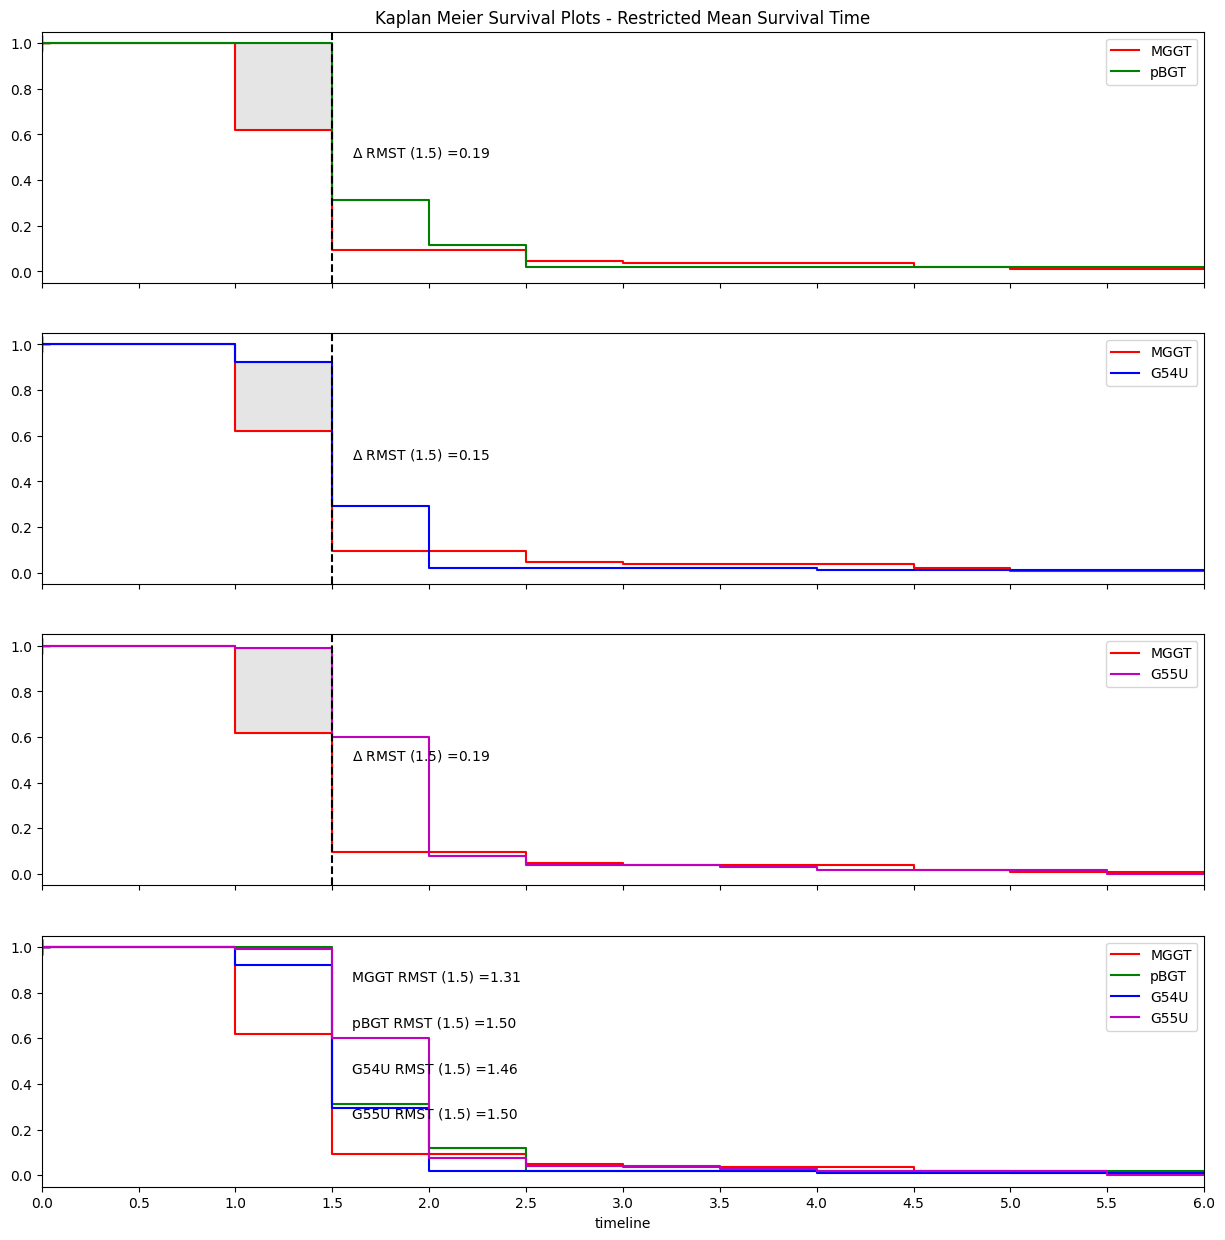

In [31]:
fig,ax=plt.subplots(4,1,sharex=True,sharey=True,figsize=(15,15))
limit=1.5
timeline=np.array([x for x in times_tot])
rmst_MGGT = restricted_mean_survival_time(kmf_MGGT, t=limit)
rmst_pBGT = restricted_mean_survival_time(kmf_pBGT, t=limit)
rmst_G54U = restricted_mean_survival_time(kmf_G54U, t=limit)
rmst_G55U = restricted_mean_survival_time(kmf_G55U, t=limit)




kmf_MGGT.plot(ax=ax[0], c="r", ci_show=False,show_censors=True)
kmf_pBGT.plot(ax=ax[0], c="g", ci_show=False,show_censors=True)
kmf_MGGT.plot(ax=ax[1], c="r", ci_show=False,show_censors=True)
kmf_G54U.plot(ax=ax[1], c="b", ci_show=False,show_censors=True)
kmf_MGGT.plot(ax=ax[2], c="r", ci_show=False,show_censors=True)
kmf_G55U.plot(ax=ax[2], c="m", ci_show=False,show_censors=True)

kmf_MGGT.plot(ax=ax[3], c="r", ci_show=False,show_censors=True)
kmf_pBGT.plot(ax=ax[3], c="g", ci_show=False,show_censors=True)
kmf_G54U.plot(ax=ax[3], c="b", ci_show=False,show_censors=True)
kmf_G55U.plot(ax=ax[3], c="m", ci_show=False,show_censors=True)



#sf_exp_at_limit = kmf_MGGT.predict(np.append(kmf_MGGT.timeline, limit)).sort_index().loc[:limit]
#ax[0].fill_between(sf_exp_at_limit.index, sf_exp_at_limit.values, step='post', color="r", alpha=0.20)

ax[0].fill_between(timeline[timeline<=limit], kmf_pBGT.predict(timeline).loc[:limit], kmf_MGGT.predict(timeline).loc[:limit], step="post", color='k', alpha=0.10)
ax[1].fill_between(timeline[timeline<=limit], kmf_G54U.predict(timeline).loc[:limit], kmf_MGGT.predict(timeline).loc[:limit], step="post", color='k', alpha=0.10)
ax[2].fill_between(timeline[timeline<=limit], kmf_G55U.predict(timeline).loc[:limit], kmf_MGGT.predict(timeline).loc[:limit], step="post", color='k', alpha=0.10)


ax[0].text(limit+.1, 0.5, r"$\Delta $ RMST (%s) =%.2f" %(limit,rmst_pBGT-rmst_MGGT))
ax[1].text(limit+.1, 0.5, r"$\Delta $ RMST (%s) =%.2f" %(limit,rmst_G54U-rmst_MGGT))
ax[2].text(limit+.1, 0.5, r"$\Delta $ RMST (%s) =%.2f" %(limit,rmst_G55U-rmst_MGGT))

ax[3].text(limit+.1, 0.85, "MGGT RMST (%s) =%.2f" %(limit,rmst_MGGT))
ax[3].text(limit+.1, 0.65, "pBGT RMST (%s) =%.2f" %(limit,rmst_pBGT))
ax[3].text(limit+.1, 0.45, "G54U RMST (%s) =%.2f" %(limit,rmst_G54U))
ax[3].text(limit+.1, 0.25, "G55U RMST (%s) =%.2f" %(limit,rmst_G55U))

ax[0].axvline(limit, ls='--', c='k')
ax[1].axvline(limit, ls='--', c='k')
ax[2].axvline(limit, ls='--', c='k')
ax[0].set_xticks(times_tot)
ax[0].set_xlim(0, 6)
ax[0].set_ylim(-.05, 1.05)

ax[0].set_title("Kaplan Meier Survival Plots - Restricted Mean Survival Time")

#plt.savefig("./figures/KM-RMST.pdf")
plt.show()


## Saving data  as csv

In [32]:
G54U_probn=G54U_prob.copy()
G55U_probn=G55U_prob.copy()
for k in MGGT_prob.keys():
    if(k not in G54U_probn):
        G54U_probn[k]=np.nan
    if(k not in G55U_probn):
        G55U_probn[k]=np.nan


In [33]:
strains_dict_list=[MGGT_prob,pBGT_prob,G54U_prob,G55U_prob]
x={"MGGT":[MGGT_prob[k] for k in MGGT_prob.keys()],"pBGT":[pBGT_prob[k] for k in MGGT_prob.keys()],"G54U":[G54U_probn[k] for k in MGGT_prob.keys()],"G55U":[G55U_probn[k] for k in MGGT_prob.keys()]}
#x2=dict([ (k,pd.Series(v)) for k,v in x.items() ])
#x2
df_strains=pd.DataFrame(x, index=MGGT_prob.keys())
df_strains.index.name = 'Time'
filemane=outdataPath+"strains_survival_prob_full.csv"
print(filemane)
pd.DataFrame.to_csv(df_strains,filemane)

/content/drive/MyDrive/SYNC_Projects/pBGT/GIT/data/analysis/resilience/data_table/strains_survival_prob_full.csv
